# Seaborn Exercises

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Use the iris database to answer the following quesitons:

In [9]:
iris = sns.load_dataset('iris')
iris.dtypes
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 1. What does the distribution of petal lengths look like?

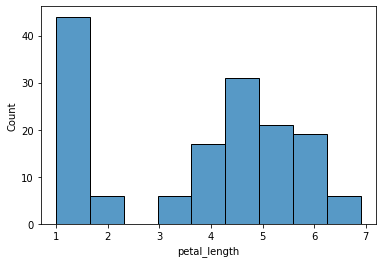

In [10]:
sns.histplot(iris.petal_length)
plt.show()

#### 2. Is there a correlation between petal length and petal width?


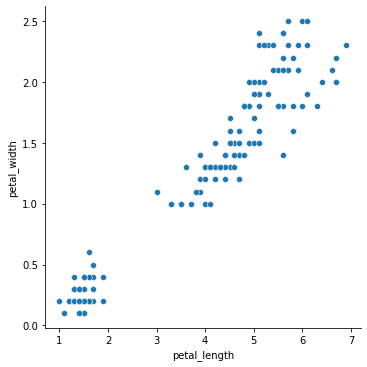

In [11]:
sns.relplot(x='petal_length', y='petal_width', data=iris)
plt.show()
# there appears to be a correlation based on this scatterplot, would need to run a regression to see how strong it is

#### 3. Would it be reasonable to predict species based on sepal width and sepal length?


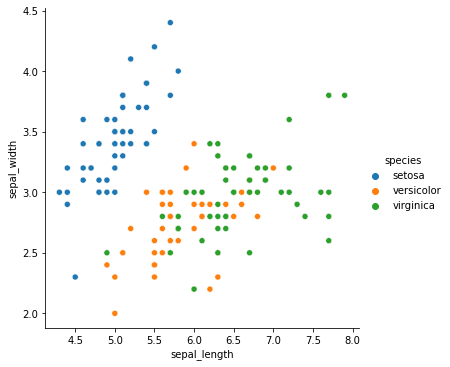

In [12]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.show()
# not really, one species seems to be predicted well, the other two have a lot of overlap

#### 4. Which features would be best used to predict species?


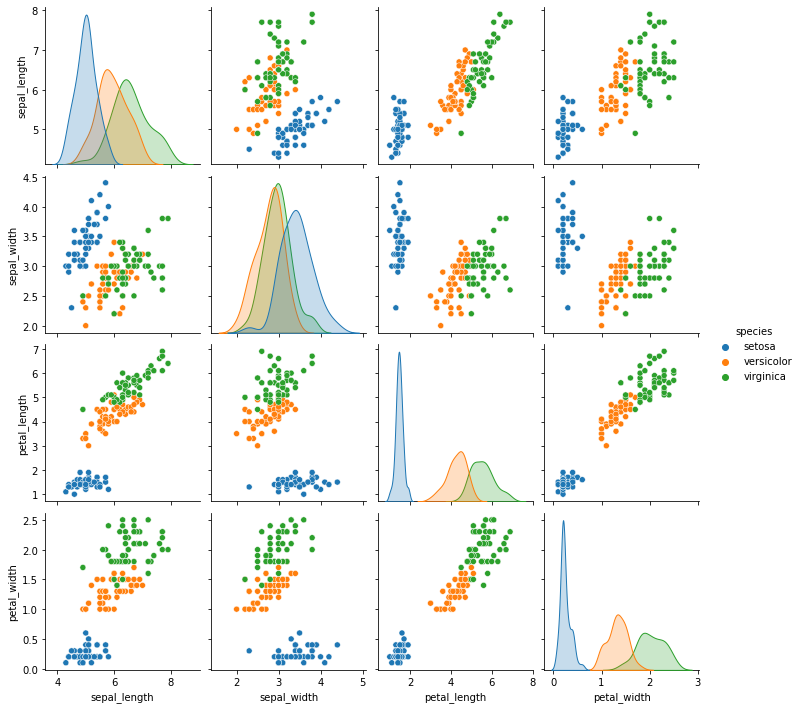

In [13]:
sns.pairplot(iris, hue='species')
plt.show()

In [113]:
# sns.pairplot(iris, hue='species')
# viz = sns.pairplot(iris, hue='species')
# viz = viz.map_upper(sns.regplot)

### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice? Plot the x and y values from the anscombe data. Each dataset should be in a separate column.


In [14]:
anscombe = sns.load_dataset('anscombe')
anscombe.dtypes
type(anscombe)
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [15]:
anscombe.groupby('dataset').agg(['count', 'min', 'max', 'mean', 'std'])

x                               y                                 
        count  min   max mean       std count   min    max      mean       std
dataset                                                                       
I          11  4.0  14.0  9.0  3.316625    11  4.26  10.84  7.500909  2.031568
II         11  4.0  14.0  9.0  3.316625    11  3.10   9.26  7.500909  2.031657
III        11  4.0  14.0  9.0  3.316625    11  5.39  12.74  7.500000  2.030424
IV         11  8.0  19.0  9.0  3.316625    11  5.25  12.50  7.500909  2.030579

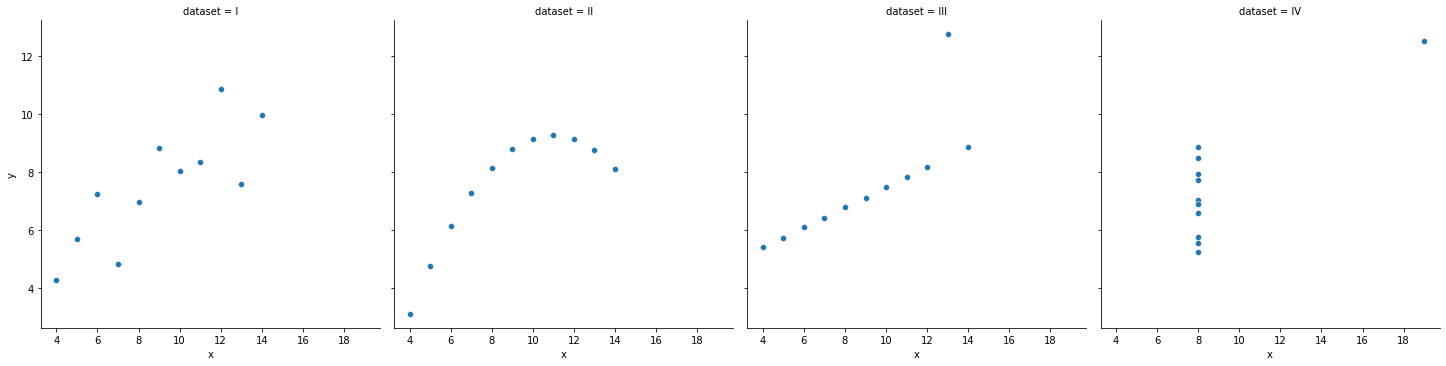

In [16]:
sns.relplot(x='x', y='y', col='dataset', data=anscombe)
plt.show()

### 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [17]:
from pydataset import data

initiated datasets repo at: /Users/adamtalbot/.pydataset/


In [18]:
sprays = data('InsectSprays')
#data('InsectSprays', show_doc=True) 
sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


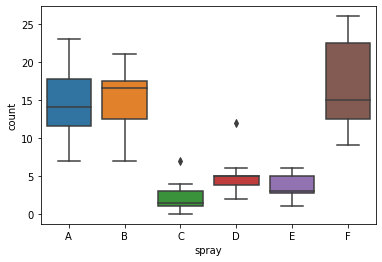

In [19]:
sns.boxplot(data=sprays, y='count', x='spray')
plt.show()

### 3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

In [20]:
from pydataset import data
swiss = data("swiss")

In [21]:
#data('swiss', show_doc=True)

In [22]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


##### a. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [23]:
swiss['is_catholic'] = swiss.Catholic >= 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


##### b. Does whether or not a province is Catholic influence fertility?

[]

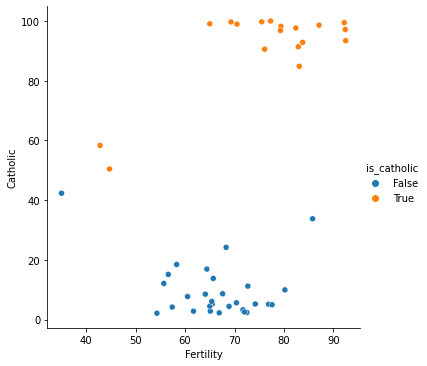

In [24]:
sns.relplot(x='Fertility', y='Catholic', hue = "is_catholic", data=swiss)
plt.plot()

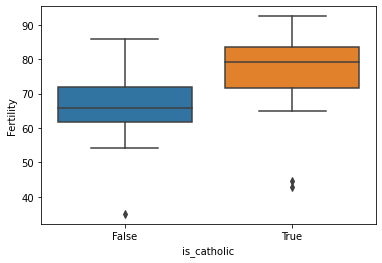

In [25]:
sns.boxplot(data=swiss, x="is_catholic", y="Fertility")
plt.show()

##### c. What measure correlates most strongly with fertility?

In [26]:
# swiss = swiss.drop(columns='is_catholic')
# swiss.head()

[]

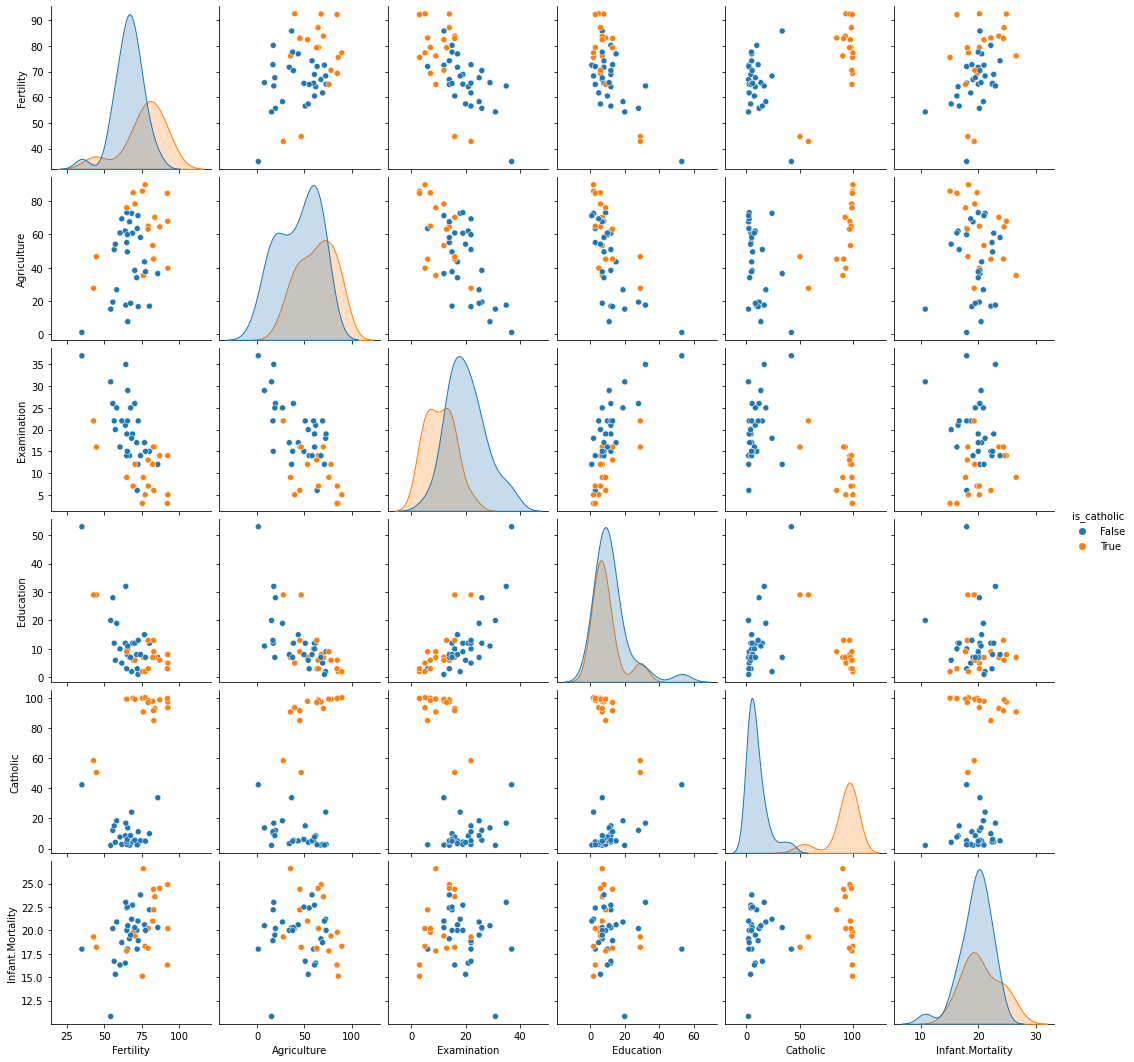

In [27]:
sns.pairplot(swiss, hue='is_catholic')
plt.plot()

In [28]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.402813
Name: Fertility, dtype: float64

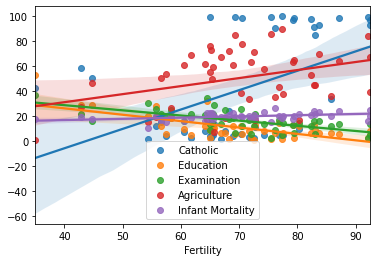

In [29]:
sns.regplot(x='Fertility', y='Catholic', data=swiss, label='Catholic')
sns.regplot(x='Fertility', y='Education', data=swiss, label='Education')
sns.regplot(x='Fertility', y='Examination', data=swiss, label='Examination')
sns.regplot(x='Fertility', y='Agriculture', data=swiss, label='Agriculture')
sns.regplot(x='Fertility', y='Infant.Mortality', data=swiss, label='Infant Mortality')
plt.legend()
plt.ylabel('')
plt.show()

In [114]:
# sns.pairplot(swiss, hue='is_catholic')
# viz = sns.pairplot(swiss, hue='is_catholic')
# viz = viz.map_upper(sns.regplot)

### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [32]:
from env import host, user, password

In [33]:
def get_db_url(user, host, password, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [35]:
chipotle = pd.read_sql('SELECT * FROM orders', get_db_url(user, host, password, 'chipotle'))
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [36]:
chipotle.item_price = chipotle.item_price.str.replace('$','', regex=False).astype('float')

In [37]:
#chipotle = chipotle.astype({'item_price': 'float'})

In [38]:
type(chipotle.item_price[0])

numpy.float64

In [39]:
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [73]:
top4 = chipotle.groupby("item_name").sum().sort_values(by=["quantity"], ascending = False).head(4).reset_index()
top4

,item_name,id,order_id,quantity,item_price
0,Chicken Bowl,1780635,713926,761,7342.73
1,Chicken Burrito,1238770,497303,591,5575.82
2,Chips and Guacamole,1122252,449959,506,2201.04
3,Steak Burrito,818163,328437,386,3851.43


In [41]:
top4 = top4.drop(columns=['id', 'order_id', 'quantity'])
top4

,item_price
item_name,
Chicken Bowl,7342.73
Chicken Burrito,5575.82
Chips and Guacamole,2201.04
Steak Burrito,3851.43


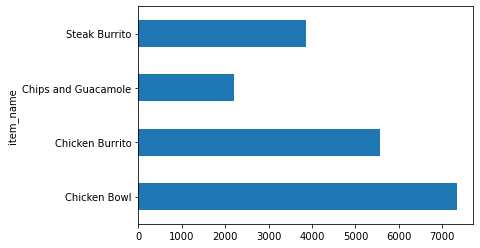

In [42]:
top4.plot.barh(legend=False)
plt.show()

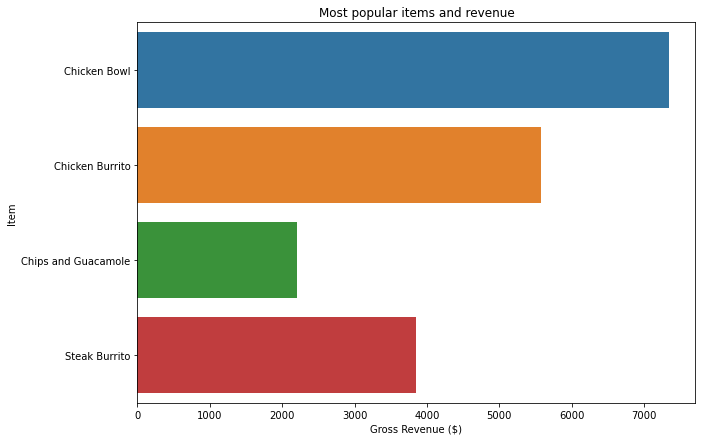

In [74]:
plt.figure(figsize = (10, 7))
sns.barplot(y = 'item_name', x = 'item_price', data = top4)
plt.title('Most popular items and revenue')

plt.ylabel("Item")
plt.xlabel("Gross Revenue ($)")
plt.show()

In [45]:
most_popular_items = chipotle.groupby('item_name').quantity.sum().nlargest(4)
most_popular_items

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [55]:
rev = chipotle[chipotle.item_name.isin(most_popular_items.index)].groupby('item_name').item_price.sum().sort_values(ascending=False).reset_index()
rev

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


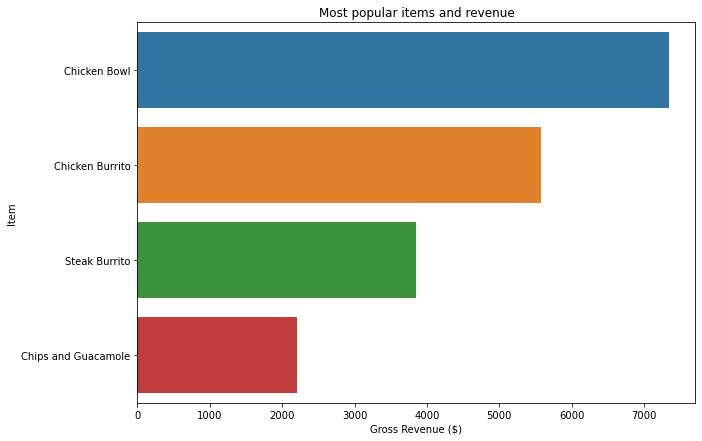

In [70]:
plt.figure(figsize = (10, 7))
sns.barplot(y = 'item_name', x = 'item_price', data = rev)
plt.title('Most popular items and revenue')

plt.ylabel("Item")
plt.xlabel("Gross Revenue ($)")
plt.show()

### 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [99]:
sleepstudy = data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [80]:
#data('sleepstudy', show_doc=True)

In [102]:
sleepstudy.dtypes

Reaction    float64
Days          int64
Subject       int64
dtype: object

In [107]:
sleepstudy.Subject = "Subject_" + sleepstudy.Subject.astype('string')

In [108]:
sleepstudy.dtypes

Reaction    float64
Days          int64
Subject      string
dtype: object

In [109]:
sleepstudy.Subject.nunique()

18

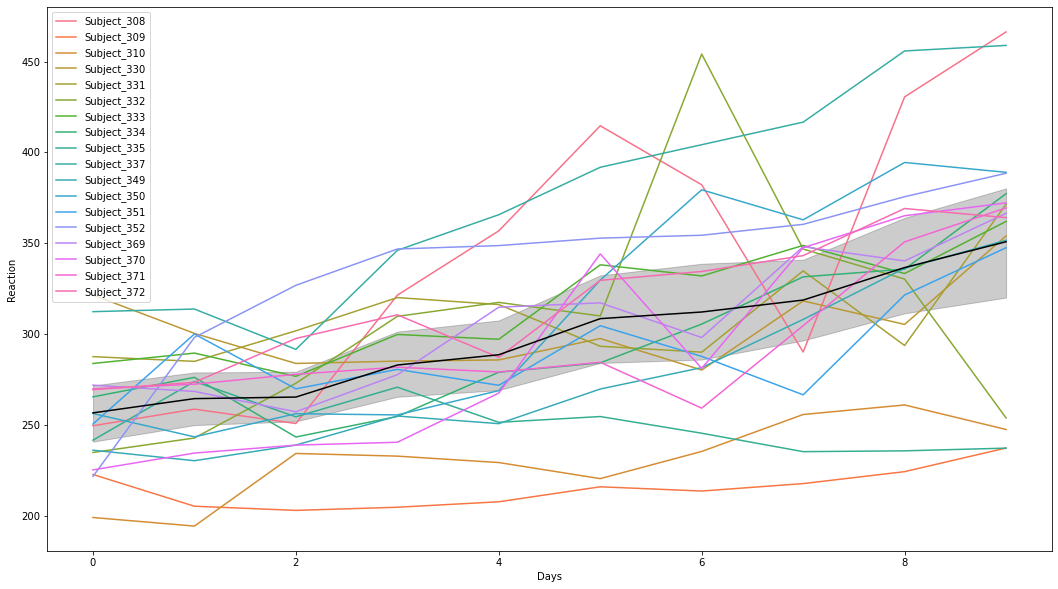

In [110]:
plt.figure(figsize=(18, 10))
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', estimator = 'mean')
plt.show()